In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2
SEED = 666

In [2]:
from sklearn.model_selection import train_test_split

In [37]:
from imblearn.over_sampling import SMOTEN, SMOTENC

In [4]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [5]:
df = df.rename(columns={'HeartDiseaseorAttack': 'y'})

In [6]:
df.columns

Index(['y', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

In [7]:
# stratify_columns = ['y', 'Education']
# train, test = train_test_split(df, test_size=0.15, stratify=df[stratify_columns], random_state=SEED)
# test.to_csv('hold_out.csv', index=False)
# train.to_csv('train.csv', index=False)

In [8]:
train = pd.read_csv('train.csv')

In [9]:
train.head()

,y,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
1,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
2,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,3.0,5.0,6.0
3,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,7.0,4.0,7.0
4,0.0,1.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,4.0,4.0,15.0,1.0,0.0,3.0,4.0,4.0


<AxesSubplot:xlabel='BMI', ylabel='Density'>

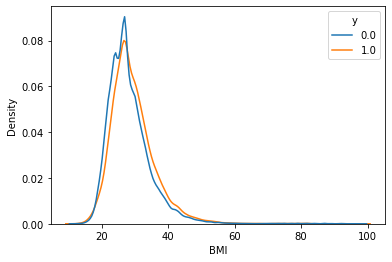

In [12]:
sns.kdeplot(data=train, x = 'BMI', hue = 'y', common_norm=False)

In [84]:
def plot_pairwise(train):
    fig, axs = plt.subplots(6, 4, figsize = (12, 9))
    axs = axs.flatten()
    features = train.drop('y', axis=1).columns
    for i, f in enumerate(features):
        to_display = train.groupby(f)[['y']].mean()
        if to_display.shape[0] < 10:
            to_display = to_display.rename(columns = {'y':'disease_proportion'})
            to_display.plot(kind='bar', ax=axs[i], legend = False)
        else:
            to_display.plot(kind='line', ax=axs[i], legend = False)
    plt.tight_layout()

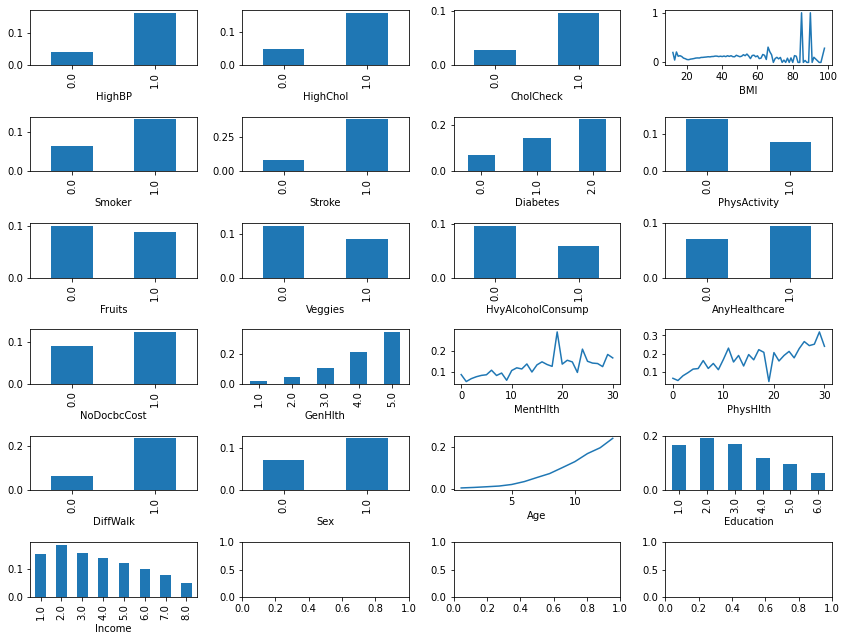

In [85]:
plot_pairwise(train)

In [76]:
#resampling for label imbalance

In [77]:
X_train, y_train = train.drop('y', axis = 1), train['y']

In [93]:
cont_features = [3, 14, 15, 18]

### TODO:
1. Over/undersampling to balance
2. Algorithmically adjust for imbalance in model

In [97]:
smote_nc = SMOTENC(categorical_features = list(set(range(len(X_train.columns))) - set(cont_features)), random_state=SEED)

In [98]:
smote_nc

SMOTENC(categorical_features=[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17,
                              19, 20],
        random_state=666)

In [100]:
X_train_resampled, y_trainresampled = smote_nc.fit_resample(X_train, y_train)

In [101]:
train_resampled = X_train_resampled.copy()
train_resampled['y'] = y_trainresampled

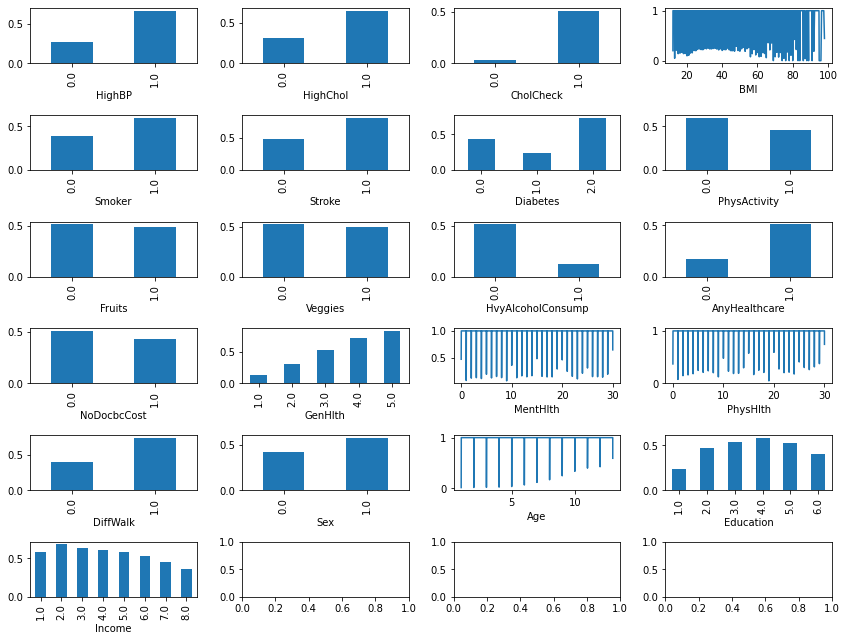

In [102]:
plot_pairwise(train_resampled)